In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [4]:
def daily_demand(mu, sigma):
    raw_usage = np.random.lognormal(mu, sigma)
    return round(raw_usage,0)

def demand_array(monthly_mu, monthly_sigma, days):
    raw_usage = np.random.lognormal(mu, sigma, days)
    return np.round(raw_usage,0)

def plot_demand_distribution(array, bins):
    plt.hist(array, 100, density=True, align='mid')

In [67]:
today_usage = daily_demand(5, .5)
today_usage

445.0

In [68]:
annual_usage = demand_array(5, .5,250)
annual_usage[:7]

array([178., 136., 161., 212., 237., 270., 234.])

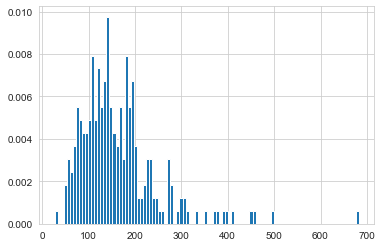

In [69]:
plot_demand_distribution(annual_usage, 1000)

In [70]:
def run_crrp_sim(usage, order_quantity, reorder_point):
    usage = usage
    inventory = order_quantity
    order_quantity = order_quantity
    reorder_point = reorder_point
    
    # Counters
    stockouts = 0
    orders = 0
    
    # Data Dictionary
    data = {'inventory': [], 'usage': [], 'stockout_quantities': []}
    
    # Simulate each days usage and apply 
    # Continous Review Reorder Point
    for day in range(len(usage)-1):
        daily_usage = usage[day]
        
        # Check for Stock Out
        if daily_usage > inventory:
            stockouts += 1
            stockout_quantities = (daily_usage - inventory)
            data['stockout_quantities'].append(stockout_quantities)
            daily_usage = inventory
        else:
            data['stockout_quantities'].append(0)
        
        inventory = inventory - daily_usage
        data['usage'].append(daily_usage)
        
        data['inventory'].append(inventory)
        
    
        if inventory < reorder_point:
            inventory = inventory + order_quantity
        
        
        
    return data
            

In [81]:
order_quantity = 2500
reorder_point = 300

In [82]:
data = run_crrp_sim(annual_usage, order_quantity, reorder_point)
inventory = np.array(data['inventory'])
stockout_qty = np.array(data['stockout_quantities'])

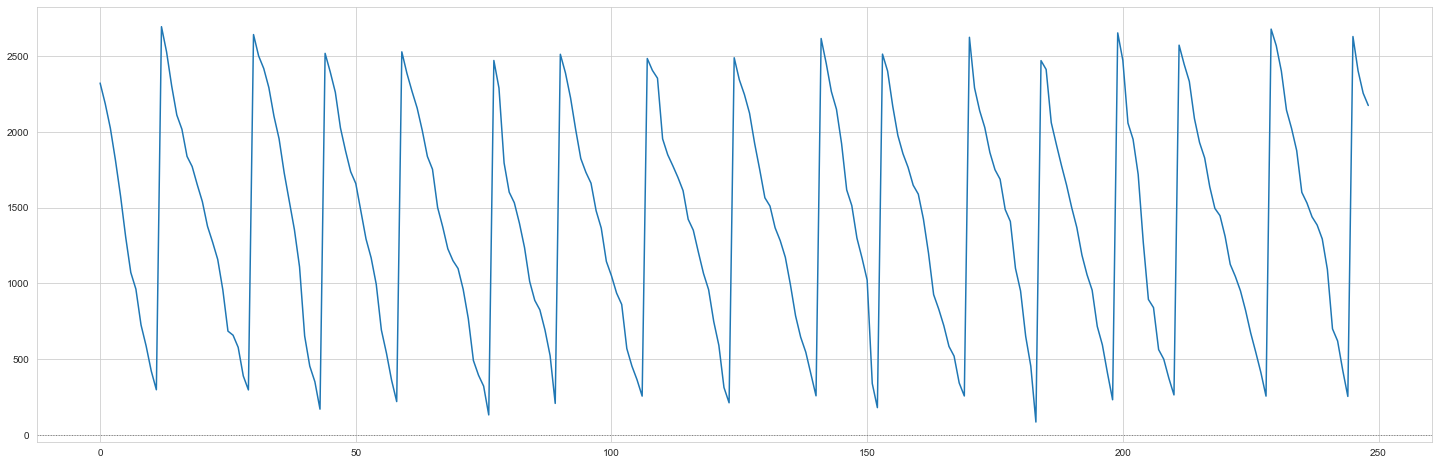

In [83]:
plt.figure(figsize=(25,8))
plt.plot(data['inventory'])
plt.axhline(0, linewidth=1, color="grey", linestyle=":")
plt.show()

In [84]:
stockout_qty.sum()

0

In [85]:
stockouts = np.count_nonzero(stockout_qty)
stockouts

0

In [86]:
inventory.max()

2694.0

In [87]:
inventory.min()

85.0

In [88]:
datadf = pd.DataFrame(data)
datadf.head()

,inventory,usage,stockout_quantities
0,2322.0,178.0,0
1,2186.0,136.0,0
2,2025.0,161.0,0
3,1813.0,212.0,0
4,1576.0,237.0,0
